## Cobweb plot of logistic dynamics

<IPython.core.display.Javascript object>


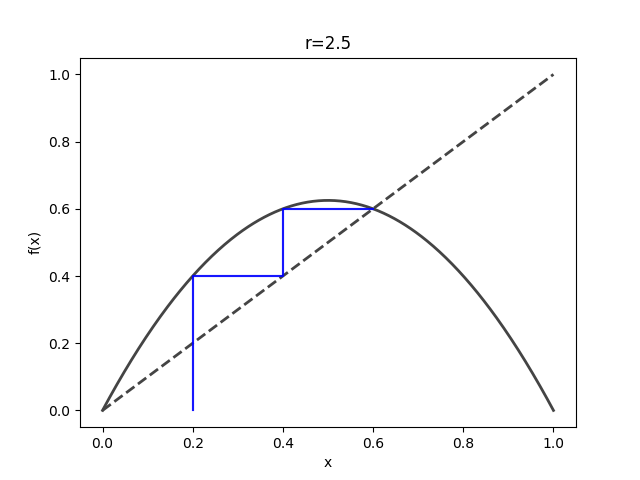

<IPython.core.display.Javascript object>


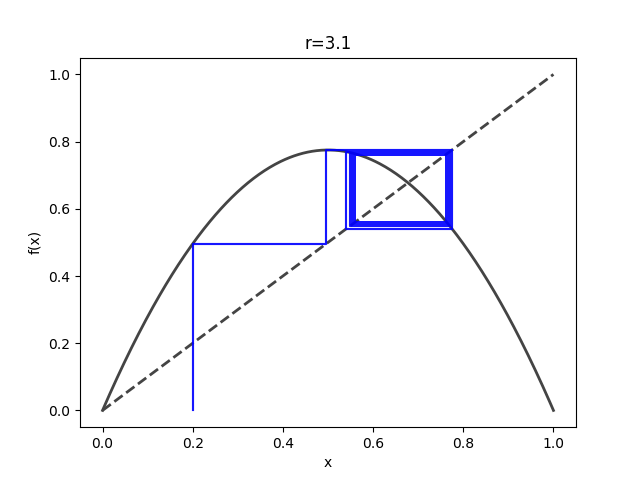

In [12]:
# Cobweb plot of logistic map
# Adapted from : https://scipython.com/blog/cobweb-plots/

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib notebook

def plot_cobweb(f, x0, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0.

    """
    x = np.linspace(0, 1, 500)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x), c='#444444', lw=2)
    ax.plot(x, x,'--', c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1])
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

# example plots

r=2.5
func = lambda x : r*x*(1-x)
plot_cobweb(func, 0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('r=%.1f' %r)

r=3.1
func = lambda x : r*x*(1-x)
plot_cobweb(func, 0.2, 200)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('r=%.1f' %r)

## Plot of logistic iterates

<IPython.core.display.Javascript object>


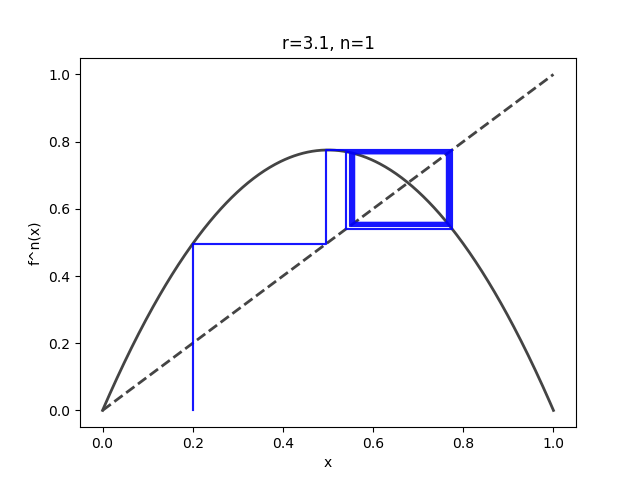

<IPython.core.display.Javascript object>


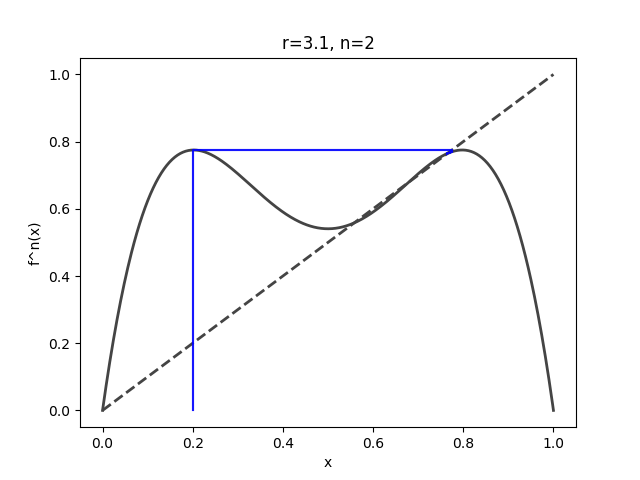

In [16]:
# function returning the nth iterate of the logistic map with parameter r
def Logistic_n(x,n=1,r=2):
    func = lambda x : r*x*(1-x)
    y = x
    for i in range(n):
        y = func(y)
    return y

# cobweb plots of n-th logistic iterate
r=3.1

n=1
func = lambda x : Logistic_n(x,n=n,r=r)
plot_cobweb(func, 0.2)
plt.xlabel('x')
plt.ylabel('f^n(x)')
plt.title('r=%.1f, n=%d' %(r,n))

n=2
func = lambda x : Logistic_n(x,n=n,r=r)
plot_cobweb(func, 0.2)
plt.xlabel('x')
plt.ylabel('f^n(x)')
plt.title('r=%.1f, n=%d' %(r,n))

## Bifurcation diagram for logistic map

<IPython.core.display.Javascript object>


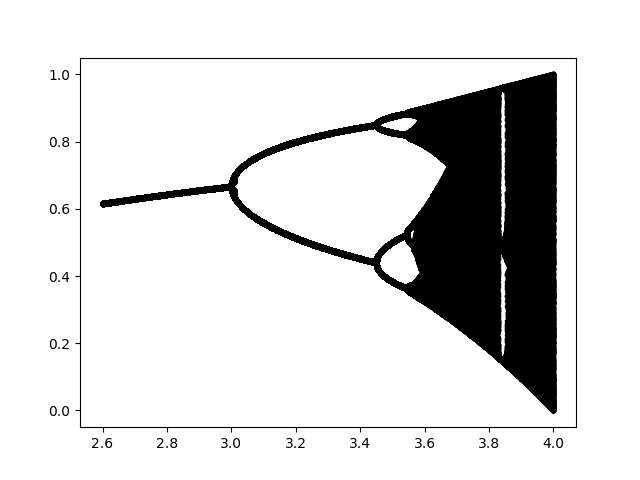

In [34]:
# parameters
t_span = 1000 # timesteps
r_span = np.linspace(2.6,4,1000) # span for parameter r

# loop over all r params and iterate a random IC for t_span iterates
x = np.empty((t_span,len(r_span)))
for i,r in enumerate(r_span):
    x[0,i] = np.random.uniform()
    for t in range(1,t_span):
        x[t,i] = Logistic_n(x[t-1,i],n=1,r=r)
        
# shave off transient (first 600 steps)
x = x[600:,:]

# plot bifurcation diagram
plt.figure();
plt.plot(r_span,x.transpose(),'k.');